# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string

In [2]:
# Download NLTK stopwords (run once)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Downloading package punkt to C:\Users\HP ProBook 440
[nltk_data]     G6\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Loading the Dataset and Analysis

In [5]:
df = pd.read_csv(r"C:\Users\HP ProBook 440 G6\Desktop\Python\Cyber-Threat-Intelligence-Custom-Data_new_processed.csv")

In [7]:
df.head()

,id,text,relations,diagnosis,solutions,id_1,label_1,start_offset_1,end_offset_1,id_2,label_2,start_offset_2,end_offset_2,id_3,label_3,start_offset_3,end_offset_3
0,249,A cybersquatting domain save-russia[.]today is...,"[{'from_id': 44658, 'id': 9, 'to_id': 44659, '...",The diagnosis is a cyber attack that involves ...,1. Implementing DNS filtering to block access ...,44656,attack-pattern,2,16,44657,url,24,43,44658.0,attack-pattern,57.0,68.0
1,14309,"Like the Android Maikspy, it first sends a not...","[{'from_id': 48531, 'id': 445, 'to_id': 48532,...",The diagnosis is that the entity identified as...,1. Implementing a robust anti-malware software...,48530,SOFTWARE,9,17,48531,malware,17,24,48532.0,Infrastucture,63.0,73.0
2,13996,While analyzing the technical details of this ...,"[{'from_id': 48781, 'id': 461, 'to_id': 48782,...",Diagnosis: APT37/Reaper/Group 123 is responsib...,1. Implementing advanced threat detection tech...,48781,threat-actor,188,194,48782,threat-actor,210,217,48783.0,threat-actor,220.0,229.0
3,13600,(Note that Flash has been declared end-of-life...,"[{'from_id': 51688, 'id': 1133, 'to_id': 51689...",The diagnosis is a malware infection. The enti...,1. Implementing a robust antivirus software th...,51687,TIME,62,79,51688,malware,207,215,51689.0,malware,247.0,258.0
4,14364,Figure 21. Connection of Maikspy variants to 1...,"[{'from_id': 51780, 'id': 1161, 'to_id': 44372...",The diagnosis is that Maikspy malware variants...,1. Implementing a robust firewall system that ...,51779,URL,163,191,51777,URL,70,93,51781.0,malware,120.0,127.0


In [9]:
df.tail()

,id,text,relations,diagnosis,solutions,id_1,label_1,start_offset_1,end_offset_1,id_2,label_2,start_offset_2,end_offset_2,id_3,label_3,start_offset_3,end_offset_3
471,5279,"Cyclops Blink, an advanced modular botnet that...","[{'from_id': 51324, 'id': 1078, 'to_id': 51323...",Diagnosis: WatchGuard Firebox devices have bee...,1. Update WatchGuard Firebox devices with the ...,51322,malware,0,13,51324,threat-actor,87,98,51323.0,threat-actor,75.0,83.0
472,1543,Sofacy Group has been associated with many at...,"[{'from_id': 46811, 'id': 231, 'to_id': 46812,...",The diagnosis is that Sofacy Group is a threat...,1. Implementing a comprehensive threat intelli...,46818,location,221,227,46819,location,229,235,46820.0,location,237.0,246.0
473,13595,The plugin has been designed to drop multiple ...,"[{'from_id': 42379, 'id': 1132, 'to_id': 51684...",The infrastructure has been targeted by an att...,1. Implementing a web application firewall (WA...,51684,Infrastucture,73,79,42379,attack-pattern,50,59,NaN,NaN,NaN,NaN
474,2368,We have uncovered a cyberespionage campaign be...,"[{'from_id': 47424, 'id': 321, 'to_id': 47423,...","Diagnosis: Earth Baku, a known APT group with ...",1. Implementing network segmentation to limit ...,47423,threat-actor,185,190,47424,threat-actor,65,75,NaN,NaN,NaN,NaN
475,14267,Based on the analysis of samples that were las...,"[{'from_id': 48487, 'id': 429, 'to_id': 48489,...",The diagnosis is that the Maikspy variant is a...,1. Educate users about the risks of downloadin...,48487,malware,128,149,48488,SOFTWARE,164,172,48486.0,identity,113.0,124.0


In [11]:
df.shape

(476, 17)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              476 non-null    int64  
 1   text            476 non-null    object 
 2   relations       476 non-null    object 
 3   diagnosis       475 non-null    object 
 4   solutions       476 non-null    object 
 5   id_1            476 non-null    int64  
 6   label_1         476 non-null    object 
 7   start_offset_1  476 non-null    int64  
 8   end_offset_1    476 non-null    int64  
 9   id_2            476 non-null    int64  
 10  label_2         476 non-null    object 
 11  start_offset_2  476 non-null    int64  
 12  end_offset_2    476 non-null    int64  
 13  id_3            329 non-null    float64
 14  label_3         329 non-null    object 
 15  start_offset_3  329 non-null    float64
 16  end_offset_3    329 non-null    float64
dtypes: float64(3), int64(7), object(7)


# Check for missing values

In [15]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 id                  0
text                0
relations           0
diagnosis           1
solutions           0
id_1                0
label_1             0
start_offset_1      0
end_offset_1        0
id_2                0
label_2             0
start_offset_2      0
end_offset_2        0
id_3              147
label_3           147
start_offset_3    147
end_offset_3      147
dtype: int64


In [17]:
# Drop rows with missing values (if any)
df = df.dropna()

# Data Preprocessing and Cleaning

In [19]:
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenize and remove stopwords
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply cleaning
df['cleaned_text'] = df['text'].apply(clean_text)

# Data Visualization

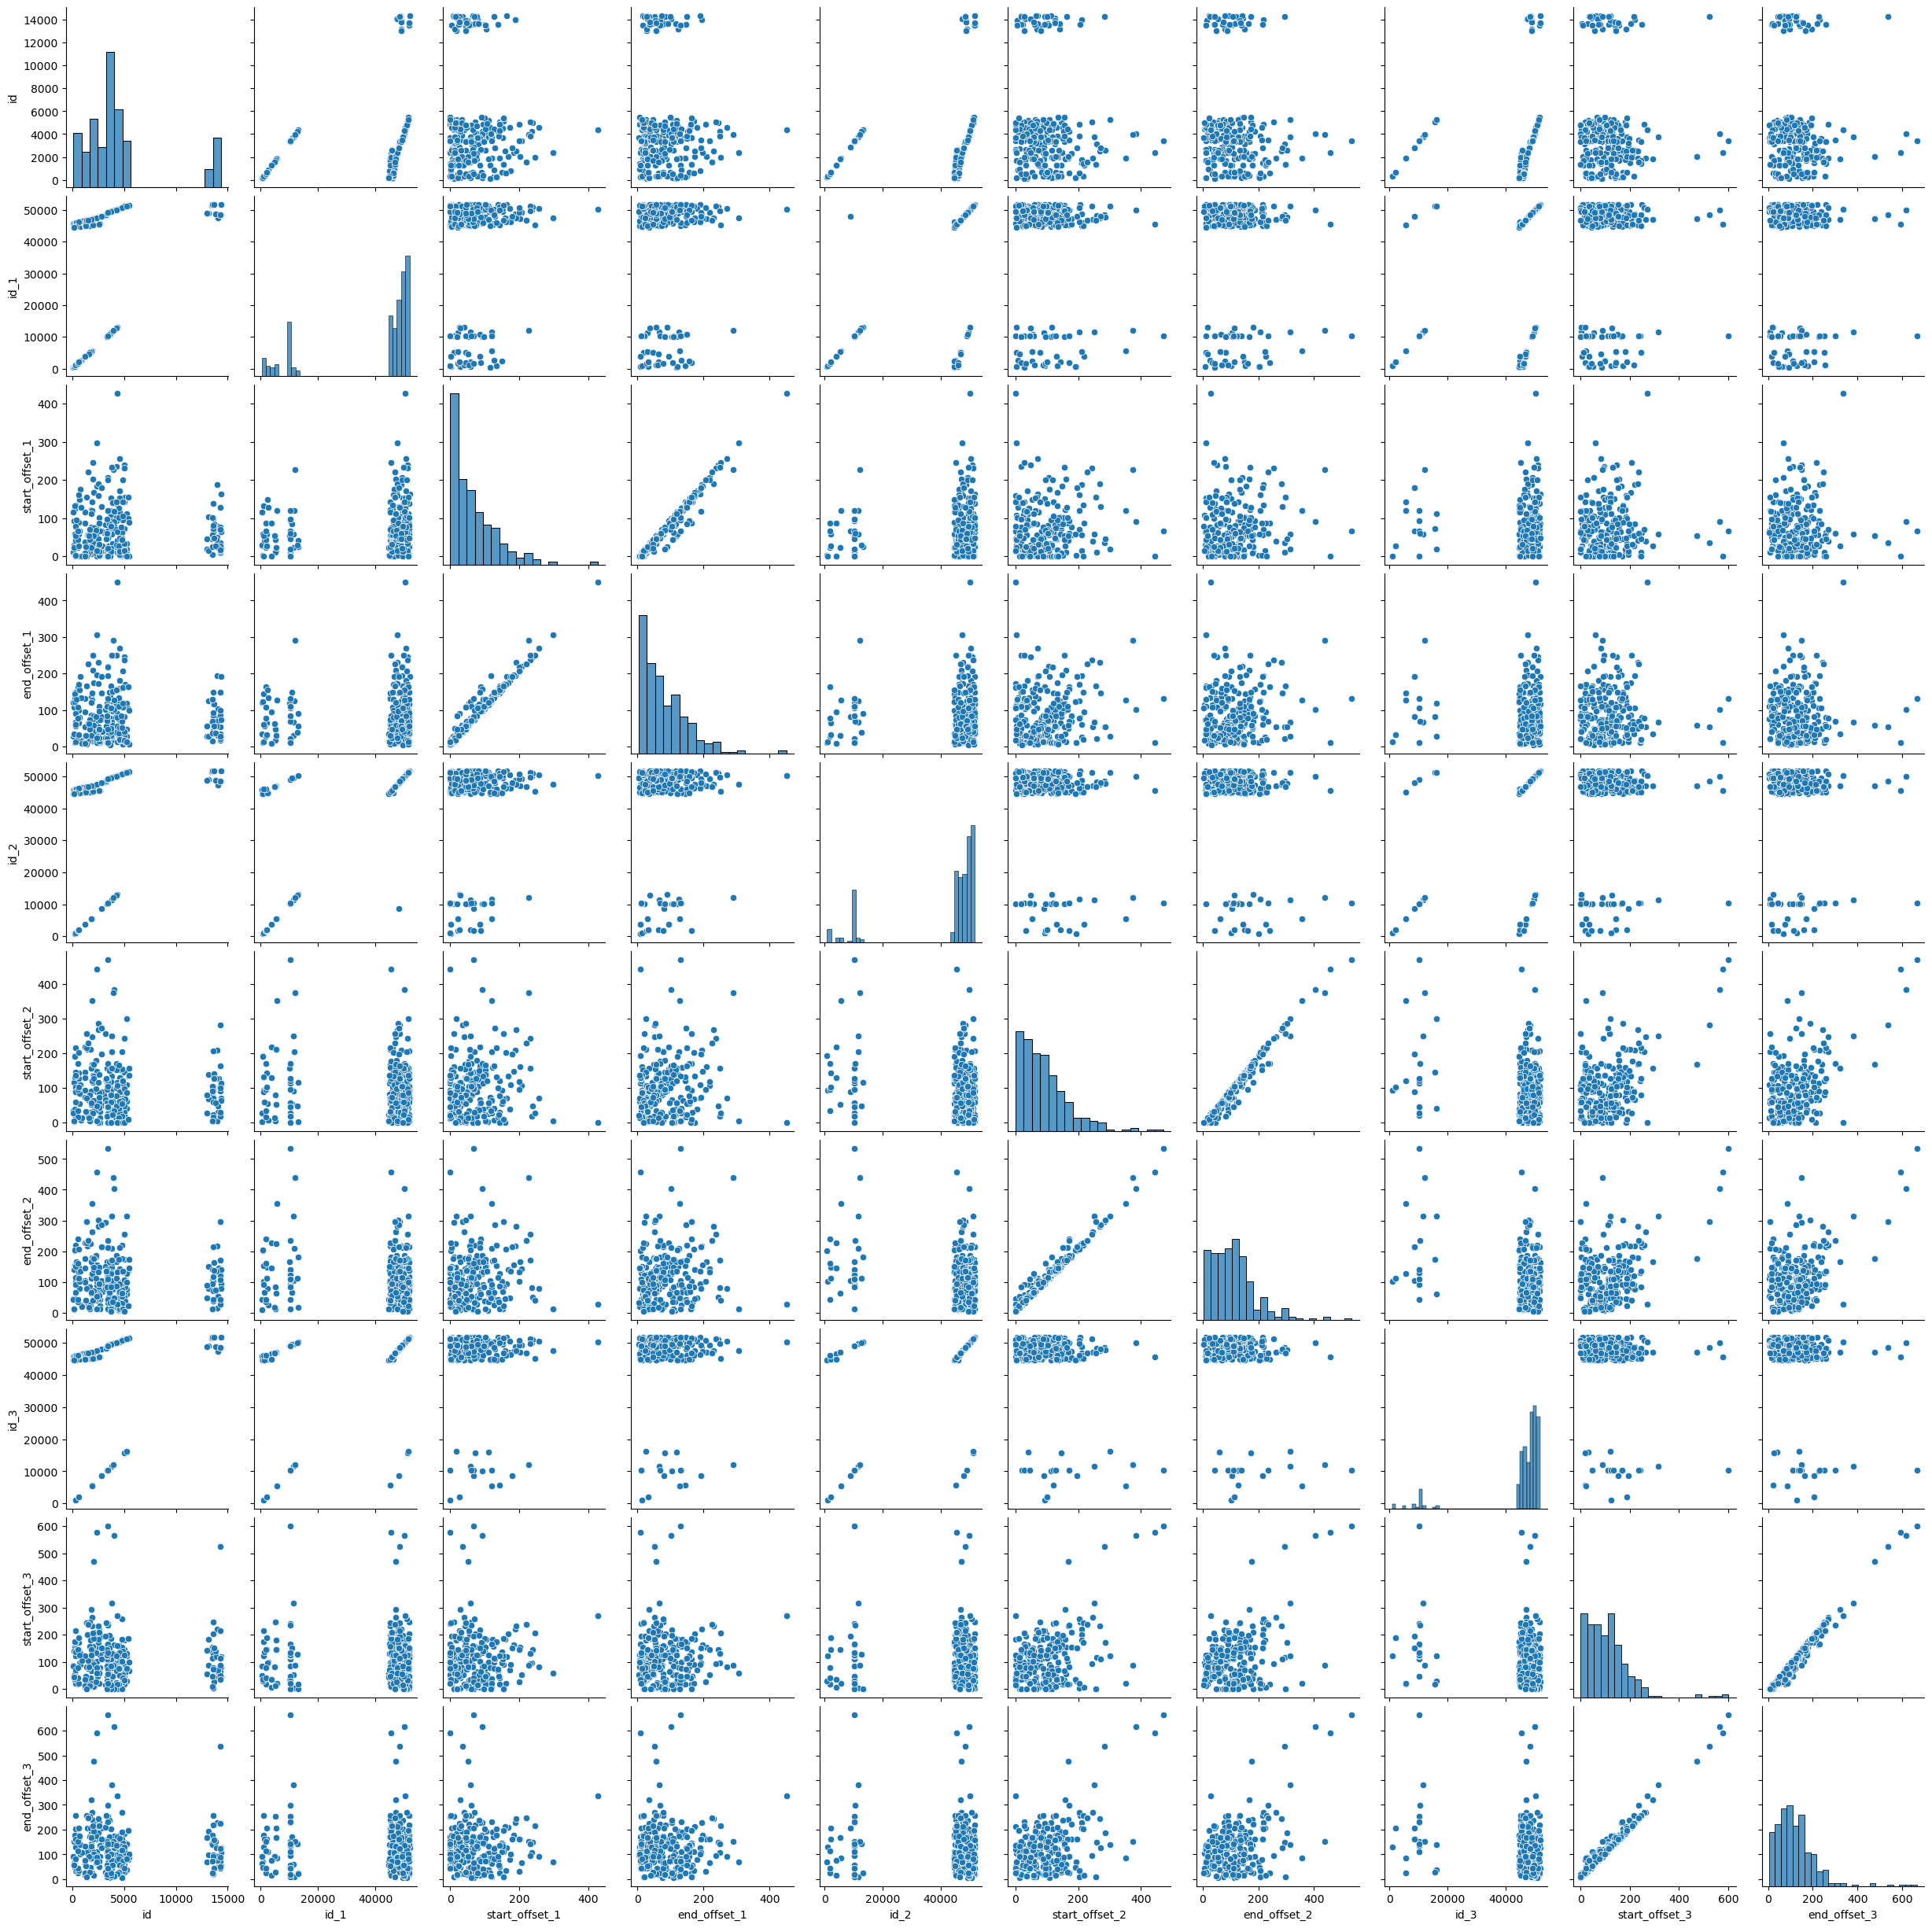

In [20]:
sns.pairplot(df)
plt.show()

# Correlation Heatmap

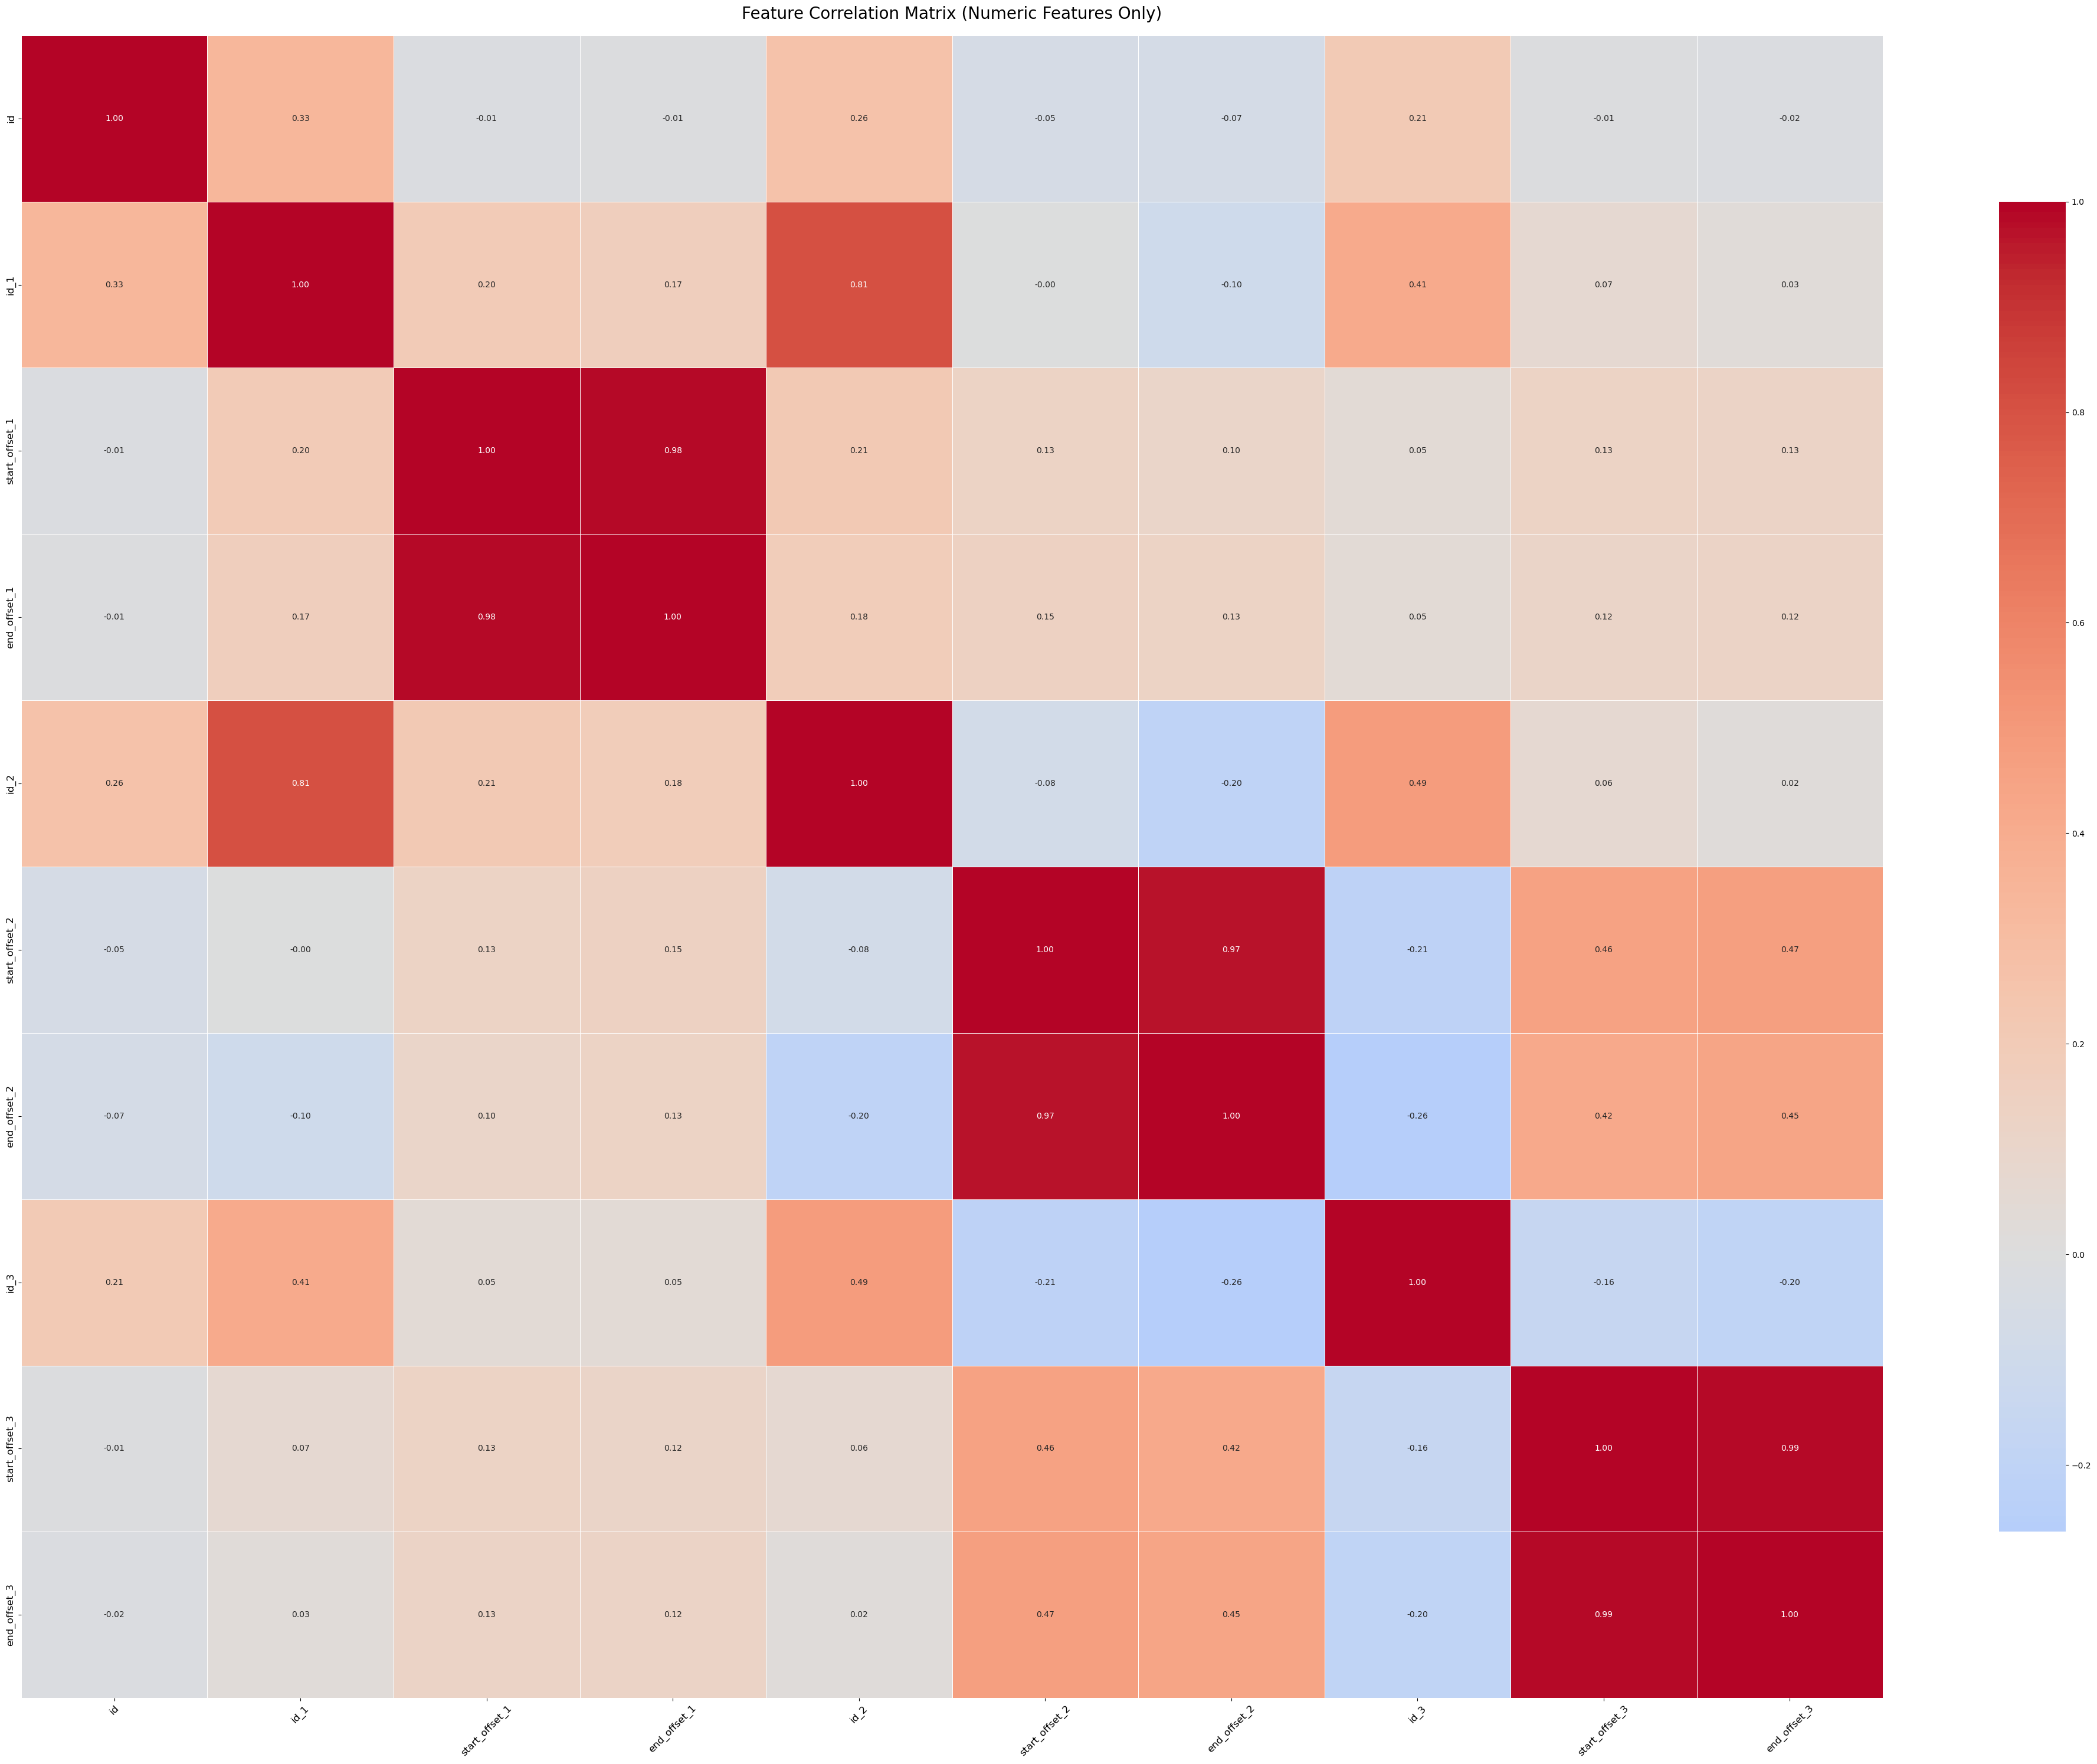

In [23]:
plt.figure(figsize=(40, 30))
numeric_df = df.select_dtypes(include=['number'])  # Only numeric columns
heatmap = sns.heatmap(
    numeric_df.corr(), 
    annot=True,
    annot_kws={'size': 10},
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title('Feature Correlation Matrix (Numeric Features Only)', fontsize=20, pad=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Feature Extraction

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
# Encode categorical variables if necessary
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [29]:
df = pd.read_csv(r"C:\Users\HP ProBook 440 G6\Desktop\Python\Cyber-Threat-Intelligence-Custom-Data_new_processed.csv")

In [31]:
# Splitting dataset into features (X) and target variable (y)
X = df.drop(columns=['label_1'])  # Adjust column name as per dataset
y = df['label_1']

In [33]:
# Initialize TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 features to avoid overfitting
X = tfidf.fit_transform(df['label_1']).toarray()
y = df['label_1'].factorize()[0]  # Convert labels to numbers (e.g., "malware" -> 0)

from sklearn.model_selection import train_test_split
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Evaluation

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools

# Random Forest

In [37]:
# Train a RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# Make predictions
y_pred = clf.predict(X_test)

In [41]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         3
          13       0.67      1.00      0.80         2
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         3

    accuracy                           0.99        96
   macro avg       0.91      0.93      0.9

C:\Users\HP ProBook 440 G6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP ProBook 440 G6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP ProBook 440 G6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


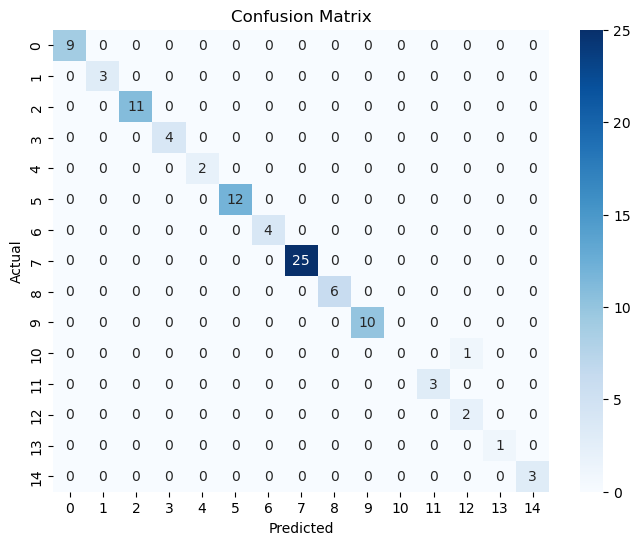

In [43]:
# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Support Vector Machine (SVM)

In [45]:
from sklearn.svm import SVC  

# Train a Support Vector Machine Classifier
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

In [51]:
# Import required libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train SVM
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)  # Linear kernel for better interpretability
svm_clf.fit(X_train, y_train)

# Make predictions
svm_pred = svm_clf.predict(X_test)

# Evaluate performance
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         3
          16       0.00      0.00      0.00         0

    accuracy                           0.99        96

C:\Users\HP ProBook 440 G6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP ProBook 440 G6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP ProBook 440 G6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP 

# Support Vector Machine Corrected Workflow

In [55]:
print(classification_report(y_test, y_pred, zero_division=0))  # Set to 0 or 1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         3
          13       0.67      1.00      0.80         2
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         3

    accuracy                           0.99        96
   macro avg       0.91      0.93      0.92        96
weighted avg       0.98   

In [57]:
print("Class counts in test set:", pd.Series(y_test).value_counts())

Class counts in test set: 8     25
6     12
2     11
10    10
0      9
9      6
3      4
7      4
15     3
1      3
12     3
5      2
13     2
14     1
11     1
Name: count, dtype: int64


In [59]:
from sklearn.utils import resample
# Upsample minority classes or downsample majority

In [61]:
svm_clf = SVC(kernel='linear', class_weight='balanced')  # Auto-adjusts for imbalance

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [65]:
from sklearn.metrics import classification_report

# 1. Check class distribution
print("Test set class distribution:\n", pd.Series(y_test).value_counts())

# 2. Train with class weights
svm_clf = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_clf.fit(X_train, y_train)

# 3. Evaluate with zero_division handled
y_pred = svm_clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

Test set class distribution:
 8     25
6     12
2     11
10    10
0      9
9      6
3      4
7      4
15     3
1      3
12     3
5      2
13     2
14     1
11     1
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         3
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00         4
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         

# Model Accuracy

In [69]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_train_score = rf_clf.score(X_train, y_train)
rf_test_score = rf_clf.score(X_test, y_test)

# Train SVM
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
svm_clf.fit(X_train, y_train)
svm_train_score = svm_clf.score(X_train, y_train)
svm_test_score = svm_clf.score(X_test, y_test)

# Create a comparison table
results = {
    'Model': ['Random Forest', 'Support Vector Machine (SVM)'],
    'Train Score': [rf_train_score, svm_train_score],
    'Test Score': [rf_test_score, svm_test_score]
}

results_df = pd.DataFrame(results)
print(results_df)

                          Model  Train Score  Test Score
0                 Random Forest     0.992105    0.989583
1  Support Vector Machine (SVM)     0.992105    0.989583


In [71]:
from tabulate import tabulate
print(tabulate(results_df, headers='keys', tablefmt='grid', showindex=False))

+------------------------------+---------------+--------------+
| Model                        |   Train Score |   Test Score |
+==============================+===============+==============+
| Random Forest                |      0.992105 |     0.989583 |
+------------------------------+---------------+--------------+
| Support Vector Machine (SVM) |      0.992105 |     0.989583 |
+------------------------------+---------------+--------------+


# Model Performance Metrics

In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score

def get_metrics(model, X, y):
    pred = model.predict(X)
    return {
        'Accuracy': accuracy_score(y, pred),
        'Precision': precision_score(y, pred, average='weighted'),
        'Recall': recall_score(y, pred, average='weighted'),
        'F1': f1_score(y, pred, average='weighted')
    }

# Compare metrics
rf_metrics = get_metrics(rf_clf, X_test, y_test)
svm_metrics = get_metrics(svm_clf, X_test, y_test)

pd.DataFrame({
    'Model': ['Random Forest', 'SVM'],
    **{k: [rf_metrics[k], svm_metrics[k]] for k in rf_metrics}
})

C:\Users\HP ProBook 440 G6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP ProBook 440 G6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP ProBook 440 G6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1
0,Random Forest,0.989583,0.982639,0.989583,0.985417
1,SVM,0.989583,0.989583,0.989583,0.989583


# Corrected code for Warnings

In [77]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_train_score = rf_clf.score(X_train, y_train)
rf_test_score = rf_clf.score(X_test, y_test)

# Train SVM
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
svm_clf.fit(X_train, y_train)
svm_train_score = svm_clf.score(X_train, y_train)
svm_test_score = svm_clf.score(X_test, y_test)

# Create a function to get metrics with zero_division handled
def get_metrics(model, X, y):
    pred = model.predict(X)
    return {
        'Accuracy': accuracy_score(y, pred),
        'Precision': precision_score(y, pred, average='weighted', zero_division=0),
        'Recall': recall_score(y, pred, average='weighted', zero_division=0),
        'F1': f1_score(y, pred, average='weighted', zero_division=0)
    }

# Get metrics for both models
rf_metrics = get_metrics(rf_clf, X_test, y_test)
svm_metrics = get_metrics(svm_clf, X_test, y_test)

# Create comparison table
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'SVM'],
    'Train Accuracy': [rf_train_score, svm_train_score],
    'Test Accuracy': [rf_test_score, svm_test_score],
    'Test Precision': [rf_metrics['Precision'], svm_metrics['Precision']],
    'Test Recall': [rf_metrics['Recall'], svm_metrics['Recall']],
    'Test F1': [rf_metrics['F1'], svm_metrics['F1']]
})

# Display the results
results_df

,Model,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1
0,Random Forest,0.992105,0.989583,0.982639,0.989583,0.985417
1,SVM,0.992105,0.989583,0.989583,0.989583,0.989583
